# Importing Libraries

In [1]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product
from scipy.stats import skewnorm

from datetime import datetime
from sklearn.impute import KNNImputer
from ydata_profiling import ProfileReport

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set()

# Reading the Data

In [2]:
df_customer = pd.read_csv('/Users/miguelcaramelo/Desktop/Data_Science/1_semestre/Data_Mining/Projeto/Data-Mining/DM_AIAI_CustomerDB (1).csv', sep = ',')

# Metadata

In [3]:
df_customer.head()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [4]:
df_customer.tail()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16916,15,100012,Ethan,Thompson,Ethan Thompson,Canada,Quebec,Quebec City,46.759733,-71.141009,...,male,Bachelor,Suburban,NaN,Single,Star,2/27/2019,2/27/2019,NaN,Standard
16917,16,100013,Layla,Young,Layla Young,Canada,Alberta,Edmonton,53.524829,-113.546357,...,female,Bachelor,Rural,NaN,Married,Star,9/20/2017,9/20/2017,NaN,Standard
16918,17,100014,Amelia,Bennett,Amelia Bennett,Canada,New Brunswick,Moncton,46.051866,-64.825428,...,male,Bachelor,Rural,NaN,Married,Star,11/28/2020,11/28/2020,NaN,Standard
16919,18,100015,Benjamin,Wilson,Benjamin Wilson,Canada,Quebec,Quebec City,46.862970,-71.133444,...,female,College,Urban,NaN,Married,Star,4/9/2020,4/9/2020,NaN,Standard
16920,19,100016,Emma,Martin,Emma Martin,Canada,British Columbia,Dawson Creek,55.720562,-120.160090,...,female,Master,Suburban,NaN,Single,Star,7/21/2020,7/21/2020,NaN,Standard


# Initial Analysis

In [5]:
# Checking shape of dataframe
df_customer.shape

(16921, 21)

In [6]:
# Checking the info of the dataframe
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   First Name               16921 non-null  object 
 3   Last Name                16921 non-null  object 
 4   Customer Name            16921 non-null  object 
 5   Country                  16921 non-null  object 
 6   Province or State        16921 non-null  object 
 7   City                     16921 non-null  object 
 8   Latitude                 16921 non-null  float64
 9   Longitude                16921 non-null  float64
 10  Postal code              16921 non-null  object 
 11  Gender                   16921 non-null  object 
 12  Education                16921 non-null  object 
 13  Location Code            16921 non-null  object 
 14  Income                

In [7]:
df_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,16921.0,8440.023639,4884.775439,0.000000,4210.000000,8440.000000,12670.000000,16900.000000
Loyalty#,16921.0,550197.393771,259251.503597,100011.000000,326823.000000,550896.000000,772438.000000,999999.000000
Latitude,16921.0,47.174500,3.307971,42.984924,44.231171,46.087818,49.282730,60.721188
Longitude,16921.0,-91.814768,22.242429,-135.056840,-120.237660,-79.383186,-74.596184,-52.712578
Income,16901.0,37758.038400,30368.992499,0.000000,0.000000,34161.000000,62396.000000,99981.000000
Customer Lifetime Value,16901.0,7990.460188,6863.173093,1898.010000,3979.720000,5780.180000,8945.690000,83325.380000


In [8]:
df_customer.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

In [9]:
# replace "" by nans
df_customer.replace("", np.nan, inplace=True)

# count of missing values
df_customer.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

In [43]:
df_customer.describe(include='all').T
df_customer[df_customer['Customer Lifetime Value'].isna()]
#df_customer['Loyalty#'].nunique()
# loyalty number should be unique for each customer
# checking duplicates in loyalty number
#df_customer[df_customer['Loyalty#']==354438]
df_customer.duplicated().sum()

np.int64(0)

# Categorical Variables' Absolute Frequencies

In [39]:
# Creating a list with the names of the non metric features
non_metric_features = ['First Name', 'Last Name', 'Customer Name', 'Country', 'Province or State', 'City','Gender', 'Education','Location Code', 'Marital Status','LoyaltyStatus','EnrollmentType']
for i in non_metric_features:
    # using the unique() method to see unique values in each non metric feature
    print(df_customer[i].unique())

['Cecilia' 'Dayle' 'Necole' ... 'Juliann' 'Olivia' 'Liam']
['Householder' 'Menez' 'Hannon' ... 'Bennett' 'Wilson' 'Martin']
['Cecilia Householder' 'Dayle Menez' 'Necole Hannon' ... 'Amelia Bennett'
 'Benjamin Wilson' 'Emma Martin']
['Canada']
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton' 'Fredericton' 'Ottawa' 'Tremblant'
 'Calgary' 'Whistler' 'Thunder Bay' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Victoria' 'Regina' 'Kelowna'
 "St. John's" 'Kingston' 'Banff' 'Charlottetown']
['female' 'male']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Urban' 'Rural' 'Suburban']
['Married' 'Divorced' 'Single']
['Star' 'Aurora' 'Nova']
['Standard' '2021 Promotion']


In [ ]:
#Plot ALL Non Numeric Variables' Absolute Counts in one figure
non_metric_features = ['Location Code','Gender', 'Education', 'Marital Status','LoyaltyStatus','EnrollmentType']
sns.set() ## Reset to darkgrid

# Setting seaborn style
sns.set_style("whitegrid")

# Setting seaborn context
sns.set_context("notebook")



## What do these do?
sp_rows = 2
sp_cols = ceil(len(non_metric_features) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(x=df_customer[feat],order=df_customer[feat].value_counts().index,ax=ax)
# Layout
# Add a centered title to the figure:
title = "NonNumeric Variables' Absolute Counts"

plt.suptitle(title)
"""
if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)
"""

plt.show()

## Bivariate Categorical Distribution

In [ ]:
cat1 = 'Gender'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)


plt.show()

In [ ]:
cat1 = 'Marital Status'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)


plt.show()

In [ ]:
cat1 = 'Marital Status'
cat2 = 'Gender'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

In [ ]:
cat1 = 'LoyaltyStatus'
cat2 = 'Gender'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)


In [ ]:
cat1 = 'LoyaltyStatus'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

In [ ]:
cat1 = 'LoyaltyStatus'
cat2 = 'Marital Status'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

In [ ]:
cat1 = 'EnrollmentType'
cat2 = 'Gender'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

In [ ]:
cat1 = 'EnrollmentType'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

In [ ]:
cat1 = 'EnrollmentType'
cat2 = 'Marital Status'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

In [ ]:
cat1 = 'EnrollmentType'
cat2 = 'LoyaltyStatus'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

## NaN's

In [ ]:
df_customer['Income'].fillna(df_customer['Income'].median(), inplace=True)
df_customer['Customer Lifetime Value'].fillna(df_customer['Customer Lifetime Value'].median(), inplace=True)
#df_customer['Customer Lifetime Value'].fillna(0, inplace=True)

#vamos dar drop nos dois por isso o problema dos nan's desaparece

In [ ]:
"""
# Explicação curta (PT):
# Usar df_customer['Income'].fillna(df_customer['Income'].median(), inplace=True)
# é uma estratégia simples e robusta contra outliers (mediana não é afetada por valores extremos).
# No entanto pode ser demasiado "global" — ignora padrões regionais ou por segmento.
# Abaixo mostro como avaliar a distribuição e 3 alternativas de imputação.

# 1) Estatísticas rápidas para decidir
print("Missing before:", df_customer['Income'].isna().sum())
print("Median:", df_customer['Income'].median())
print("Mean:", df_customer['Income'].mean())
print("Skew:", df_customer['Income'].skew())
print(df_customer['Income'].describe(percentiles=[.25, .5, .75]))

# 2) Opção simples (já tens): mediana global
df_customer['Income_imputed_median'] = df_customer['Income'].fillna(df_customer['Income'].median())

# 3) Melhor: mediana por grupo (ex.: por Education ou Location Code) — preserva diferenças entre segmentos
group_col = 'Education'  # podes alterar para 'Location Code' ou outro
df_customer['Income_imputed_group'] = df_customer['Income'].fillna(
    df_customer.groupby(group_col)['Income'].transform('median')
)

# 4) Imputação baseada em KNN (usa outras variáveis numéricas para estimar)
#    Útil se Income correlaciona com outras features numéricas.
num_cols = ['Income', 'Customer Lifetime Value', 'Latitude', 'Longitude']
# cria cópia para não sobrescrever original caso queiras comparar
df_knn = df_customer[num_cols].copy()
knn = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn.fit_transform(df_knn), columns=num_cols, index=df_knn.index)
df_customer['Income_imputed_knn'] = df_knn_imputed['Income']

# 5) Alternativa complementar: criar um indicador de missing (útil para modelos)
df_customer['Income_was_missing'] = df_customer['Income'].isna().astype(int)

# Resumo das três imputações
print("\nMissing after imputations (should be 0 for *_imputed_* columns):")
print("median:", df_customer['Income_imputed_median'].isna().sum())
print("group:", df_customer['Income_imputed_group'].isna().sum())
print("knn:", df_customer['Income_imputed_knn'].isna().sum())

# Conclusão (decidir qual usar):
# - Mantém a mediana global se não houver subgrupos com distribuições muito distintas.
# - Usa mediana por grupo se Income variar por Education/Location etc.
# - Usa KNN se houver boa correlação com outras variáveis numéricas e queres imputação mais "informada".
# - Mantém o indicador de missing para permitir ao modelo capturar informação que a imputação possa ocultar.
"""

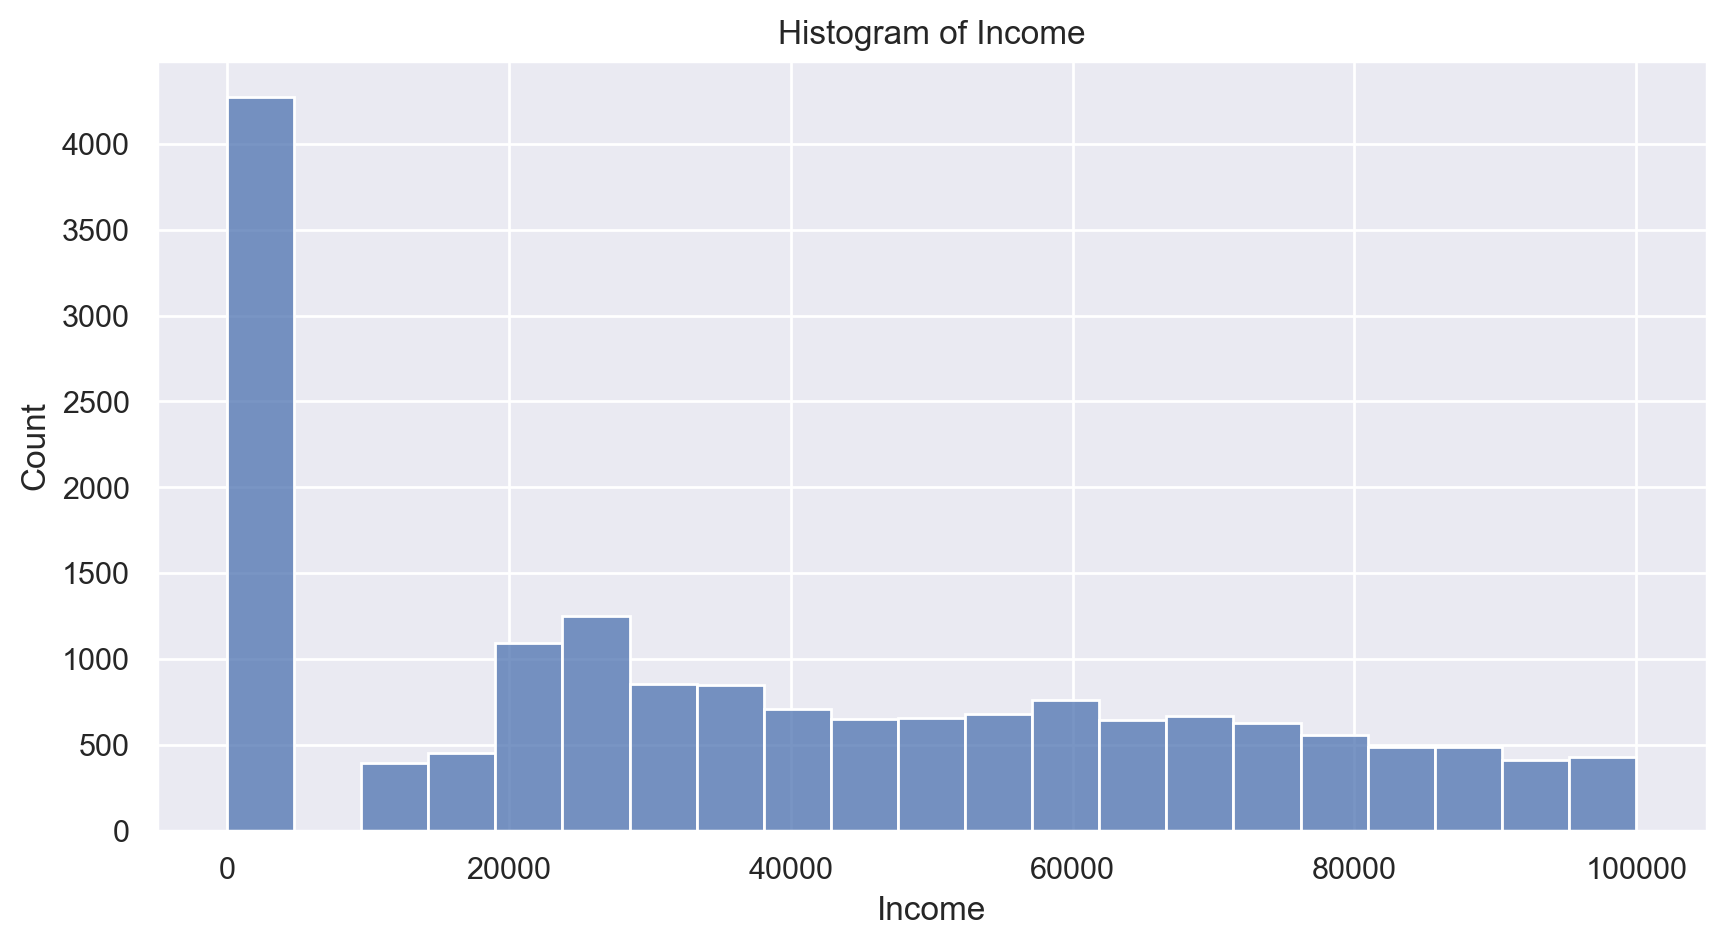

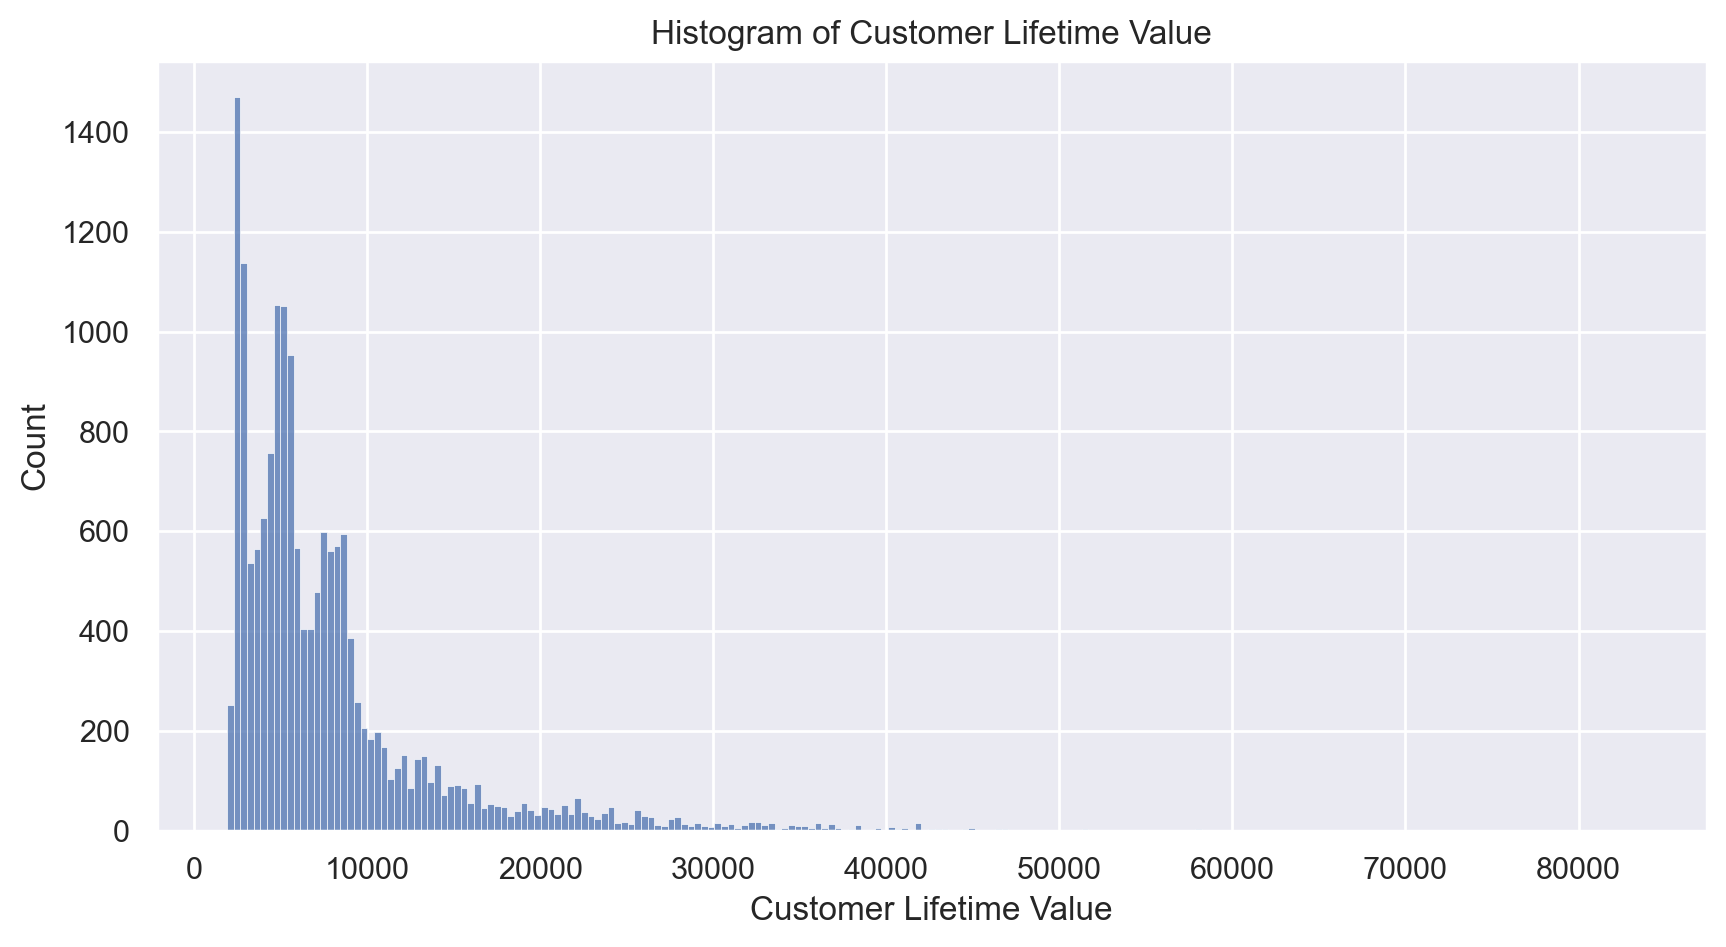

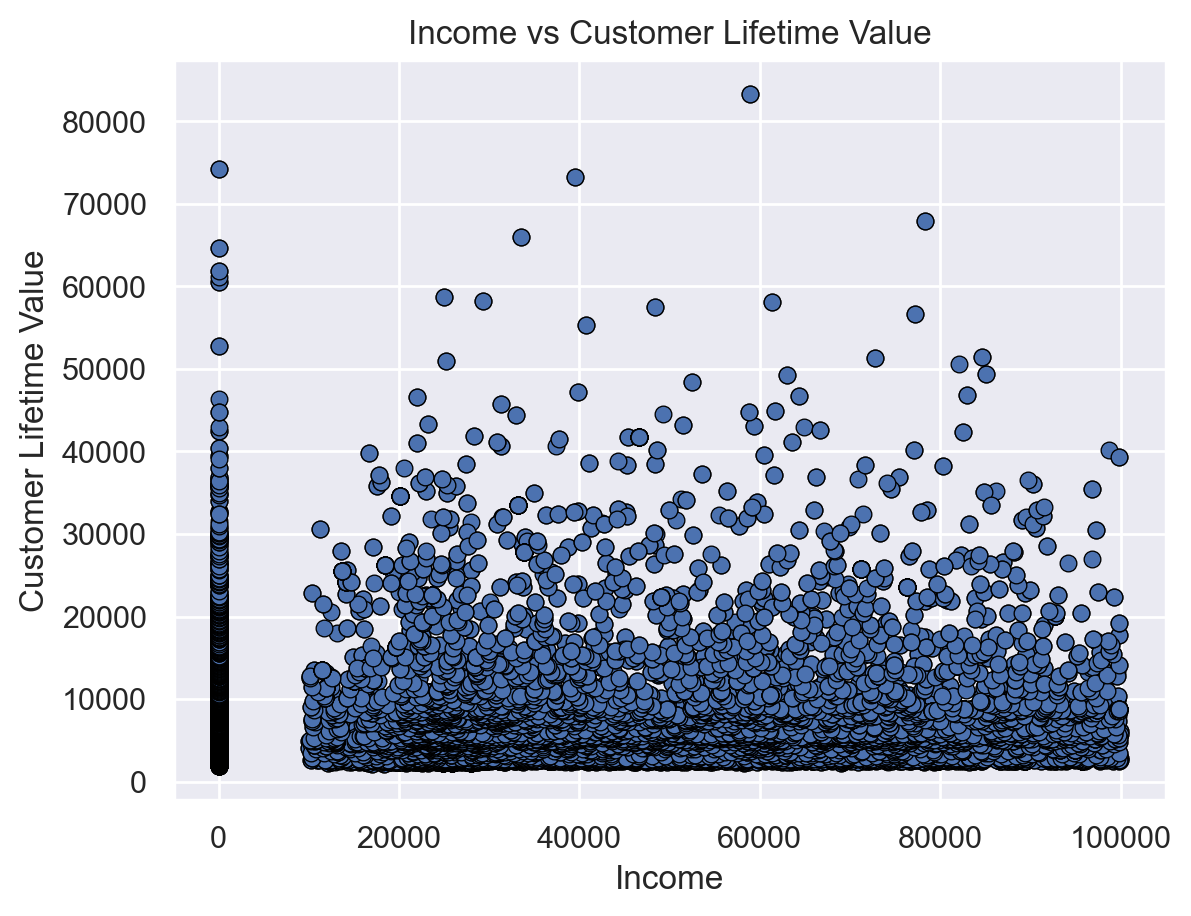

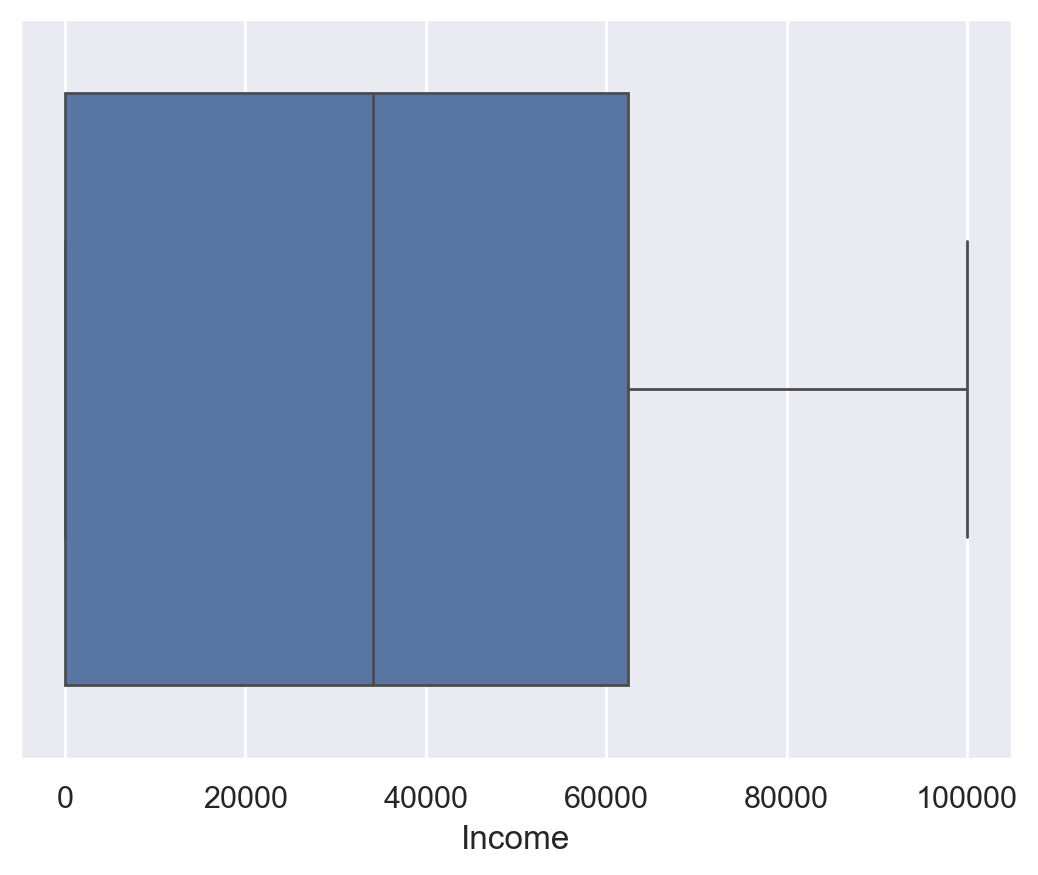

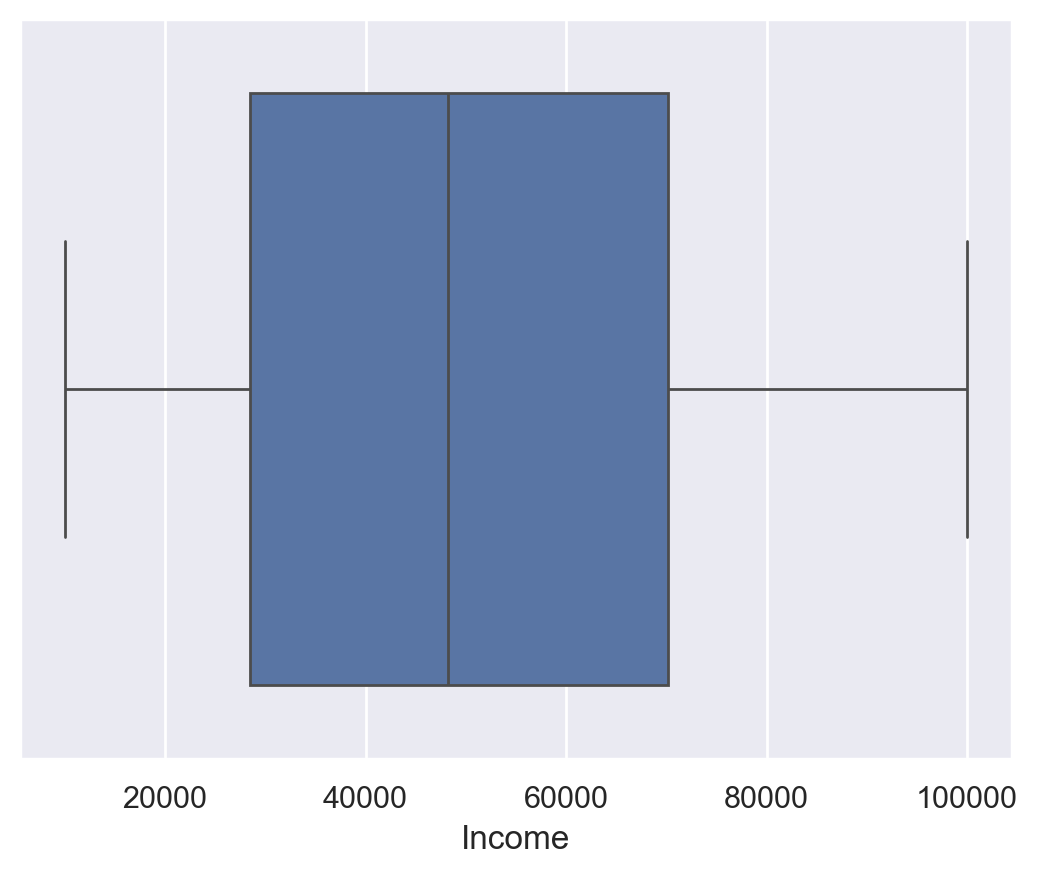

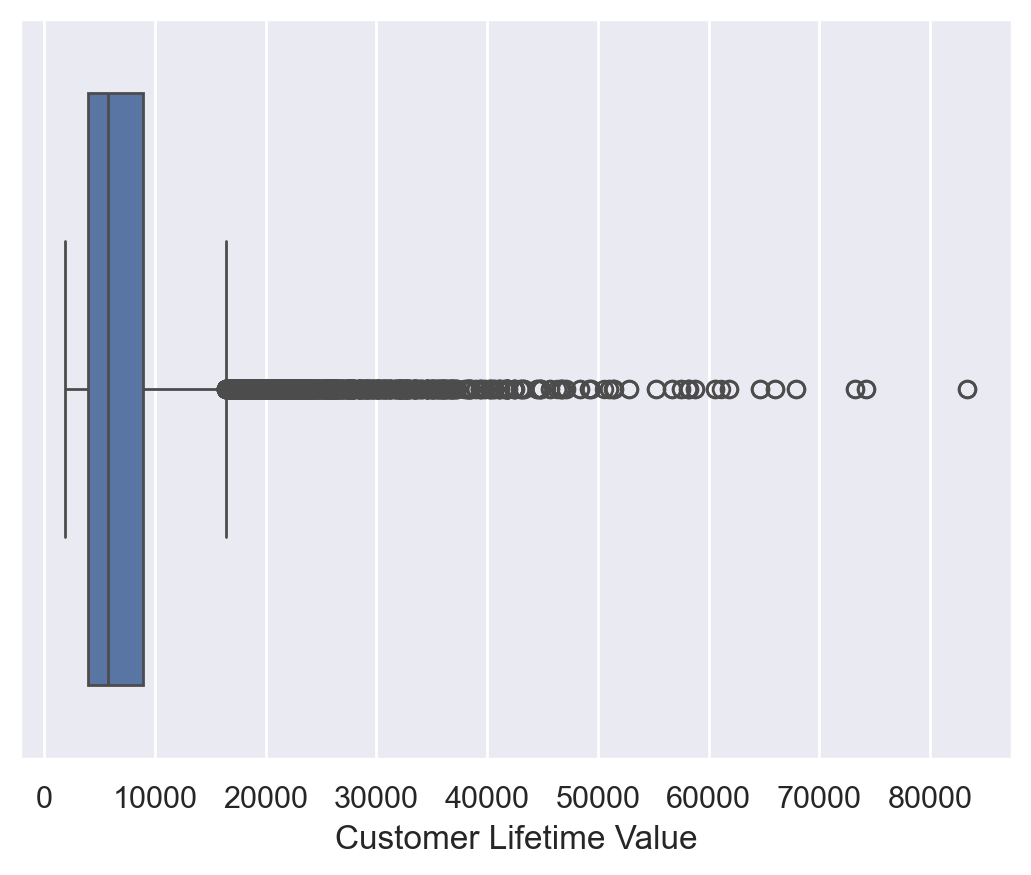

In [30]:
numeric_features = ['Income', 'Customer Lifetime Value']
for i in numeric_features:
    plt.figure(figsize=(10,5))
    sns.histplot(x=df_customer[i])
    plt.title(f'Histogram of {i}')
    plt.show()

sns.scatterplot(data=df_customer, x='Income', y='Customer Lifetime Value', edgecolor='black')
plt.title('Income vs Customer Lifetime Value')
plt.show()
sns.boxplot(x = df_customer['Income'])
plt.show()
sns.boxplot(x = df_customer[df_customer['Income']> 0]['Income'])
plt.show()
sns.boxplot(x = df_customer['Customer Lifetime Value'])
plt.show()

In [40]:
df_customer[(df_customer['Income'] != 0) & (df_customer['Education'] == "College")]

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16902,1,999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,...,male,College,Rural,NaN,Single,Star,8/22/2017,8/22/2017,NaN,Standard
16903,2,999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,...,male,College,Rural,NaN,Married,Star,9/12/2015,9/12/2015,NaN,Standard
16904,3,999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,...,female,College,Rural,NaN,Married,Star,6/10/2019,6/10/2019,NaN,Standard
16905,4,999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,...,female,College,Suburban,NaN,Married,Star,7/20/2019,7/20/2019,NaN,Standard
16906,5,999992,Ella,Roy,Ella Roy,Canada,Ontario,Toronto,43.706878,-79.437412,...,male,College,Suburban,NaN,Single,Star,3/27/2021,3/27/2021,NaN,Standard
16907,6,999993,Elijah,Cook,Elijah Cook,Canada,British Columbia,Dawson Creek,55.701475,-120.181716,...,female,College,Suburban,NaN,Married,Star,1/27/2015,1/27/2015,NaN,Standard
16908,7,999994,Ethan,Chan,Ethan Chan,Canada,Ontario,Ottawa,45.365906,-75.723181,...,female,College,Rural,NaN,Married,Star,5/5/2016,5/5/2016,NaN,Standard
16909,8,999995,Liam,Wong,Liam Wong,Canada,Ontario,Ottawa,45.471557,-75.704868,...,female,College,Suburban,NaN,Married,Star,3/2/2020,3/2/2020,NaN,Standard
16911,10,999997,Grace,Miller,Grace Miller,Canada,New Brunswick,Moncton,46.067243,-64.729480,...,male,College,Urban,NaN,Married,Star,1/19/2020,1/19/2020,NaN,Standard
16919,18,100015,Benjamin,Wilson,Benjamin Wilson,Canada,Quebec,Quebec City,46.862970,-71.133444,...,female,College,Urban,NaN,Married,Star,4/9/2020,4/9/2020,NaN,Standard


In [ ]:
df_customer["EnrollmentDateOpening"] = pd.to_datetime(df_customer["EnrollmentDateOpening"])
df_customer["CancellationDate"] = pd.to_datetime(df_customer["CancellationDate"], errors='coerce')


In [ ]:
#df_customer['CustomerTenure'] = (df_customer['CancellationDate'].fillna() - df_customer['EnrollmentDateOpening'])
#df_customer

#fazer histograma com as customr tenure
# % de clientes ativos vs cancelados

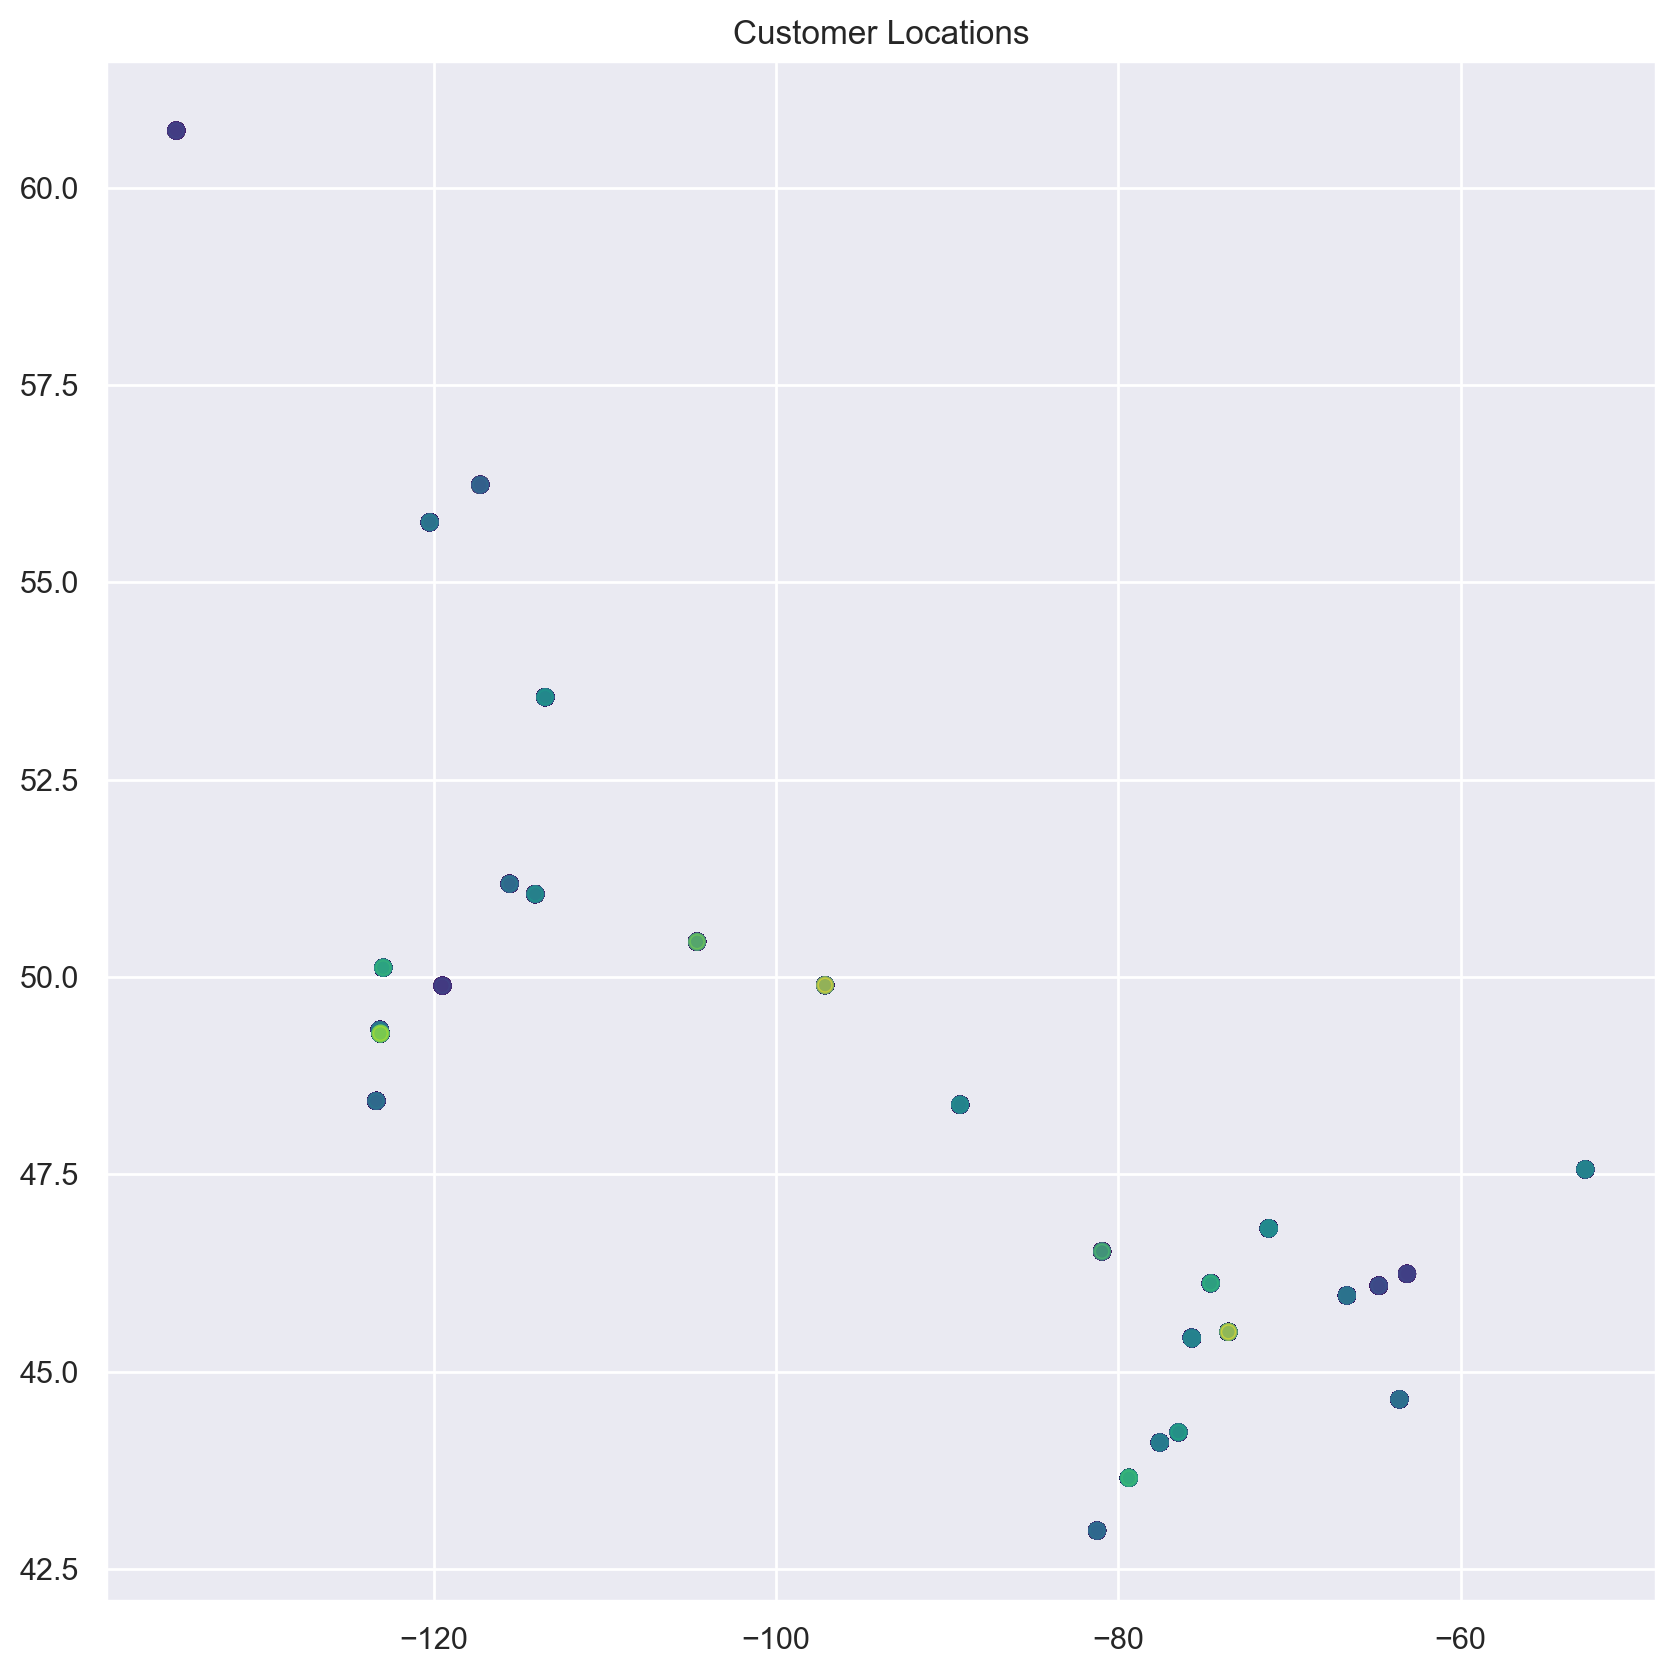

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
plotlyex
plt.figure(figsize=(10,10))
plt.scatter(df_customer['Longitude'], df_customer['Latitude'], c=df_customer['Customer Lifetime Value'], cmap='viridis', s=30, alpha=0.5)
plt.title('Customer Locations')
plt.show()